ARIMA stands for Auto-Regressive Integrated Moving Average.

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

df=pd.read_csv("international-airline-passengers.csv")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.columns = ['Month','Passenger']

In [4]:
df

,Month,Passenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
df['Month'] = pd.to_datetime(df['Month'],format='%Y-%m')

In [6]:
df['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [7]:
df.set_index('Month',inplace=True)

In [8]:
split_point = int(len(df) * 0.8)
train_data, test_data = df.iloc[:split_point], df.iloc[split_point:]

In [9]:
# Fit the AR model
ar_model = AutoReg(train_data['Passenger'],lags=5)
ar_results = ar_model.fit()

In [10]:
#Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

In [12]:
#Calculate MAE & RMSE
mae = mean_absolute_error(test_data['Passenger'],y_pred)
rmse = np.sqrt(mean_squared_error(test_data['Passenger'],y_pred))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 66.05
Root Mean Squared Error: 77.73


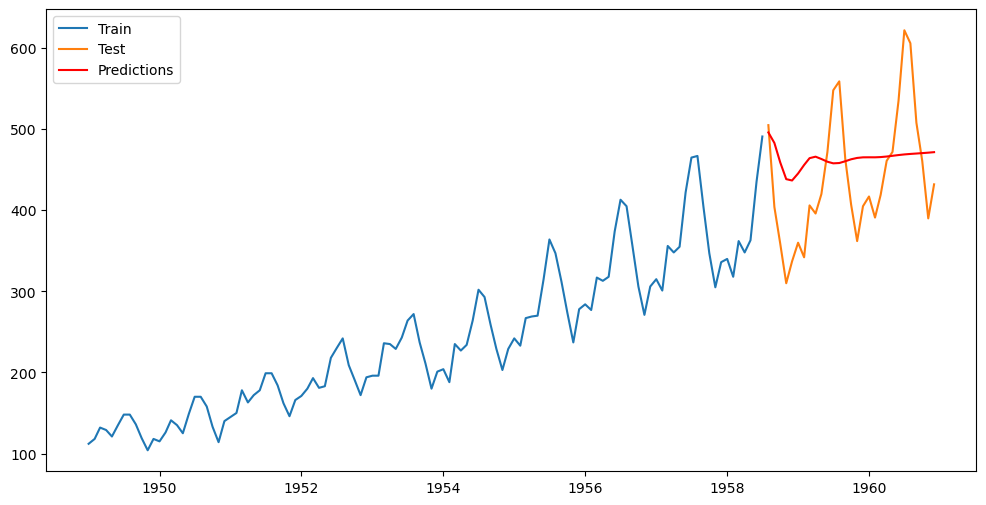

In [13]:
#Plot train, test and prediction
plt.figure(figsize=(12, 6))
plt.plot(train_data['Passenger'],label='Train')
plt.plot(test_data['Passenger'],label='Test')
plt.plot(test_data.index, y_pred, label='Predictions', color='red')
plt.legend()
plt.show()

In [17]:
import pickle
from statsmodels.tsa.ar_model import AutoReg

# Fit the AutoReg model
model_ar = AutoReg(train_data['Passenger'], lags=5)
model_ar_fit = model_ar.fit()

# Save the fitted model using pickle
with open('arima.pkl', 'wb') as file:
    pickle.dump(model_ar_fit, file)

print('Model saved successfully')


Model saved successfully


In [18]:
# Define the content of the updated Streamlit script
streamlit_code = """
import streamlit as st
import pickle
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# Load the pre-trained forecasting model
with open('arima.pkl', 'rb') as file:
    model = pickle.load(file)
    
# Create the web app
st.title('Passenger Prediction App')

# Input: Select a base date
base_date = st.date_input("Select the base date:", value=datetime.today())

# Input: Enter the number of months for prediction
month_delta = st.number_input('Number of months to predict:', min_value=1, max_value=120, value=1)

# Generate future dates based on the inputs
future_dates = [base_date + relativedelta(months=i) for i in range(1, month_delta + 1)]

# Prepare a DataFrame for prediction
future_data = pd.DataFrame({'Date': future_dates})
future_data['Month'] = future_data['Date'].dt.month  # Extract month if required
future_data['Year'] = future_data['Date'].dt.year   # Extract year if required

# Predict passengers
st.write("### Predicting Passenger Count...")
try:
    predictions = model.predict(start=len(future_dates), end=len(future_dates+ prediction")
Finallym>
    Finally.



"""

# Specify the file path where the passengerpredict.py file will be saved
file_path = 'passengerpredict.py'

# Write the content to the file
with open(file_path, 'w') as file:
    file.write(streamlit_code)

print(f"File '{file_path}' has been saved.")


File 'passengerpredict.py' has been saved.
